In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_17_03_2022_04_43_39.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
0,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,1,27.932460,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
1,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,2,28.180044,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
2,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,3,27.617582,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
3,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,4,27.168458,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
4,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,5,27.015592,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
5,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,6,27.456407,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
6,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,7,27.220222,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
7,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,8,27.998972,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
8,WLStarLearner,PDFA - af5de165d09c427cbcb9d67260fa8243,198,198,9,27.137994,1182,1,397.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
9,WLStarLearner,PDFA - 13038bd0a6384895bc22628245128124,100,100,1,2.414975,594,1,201.0,3.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0


In [5]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [6]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs})
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR']
grouped_multiple.reset_index(inplace = True)

In [7]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOPartition_median,OOPartition_IQR,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR
0,QuantNaryTreeLearner,87,0.215798,0.007776,531.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,87.0,0.0,87.0,0.0,0.0,0.0
1,QuantNaryTreeLearner,90,0.220969,0.004450,549.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,90.0,0.0,90.0,0.0,0.0,0.0
2,QuantNaryTreeLearner,99,0.273102,0.008842,603.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,99.0,0.0,99.0,0.0,0.0,0.0
3,QuantNaryTreeLearner,100,0.276211,0.019041,609.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0
4,QuantNaryTreeLearner,101,0.287251,0.005103,615.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,101.0,0.0,101.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,WLStarLearner,306,123.150739,1.257441,1830.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,306.0,0.0,1839.0,0.0,0.0,0.0
68,WLStarLearner,311,131.697667,18.098616,2203.5,687.0,1.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,311.0,0.0,2212.5,687.0,0.0,0.0
69,WLStarLearner,312,175.101730,2.482934,2531.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,312.0,0.0,2540.0,0.0,0.0,0.0
70,WLStarLearner,313,134.090600,3.806263,1872.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,313.0,0.0,1881.0,0.0,0.0,0.0


In [8]:
len(grouped_multiple)

72

Text(0, 0.5, 'Learning Time Median (s)')

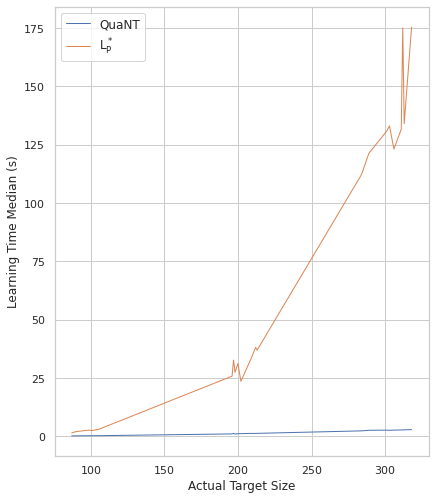

In [9]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

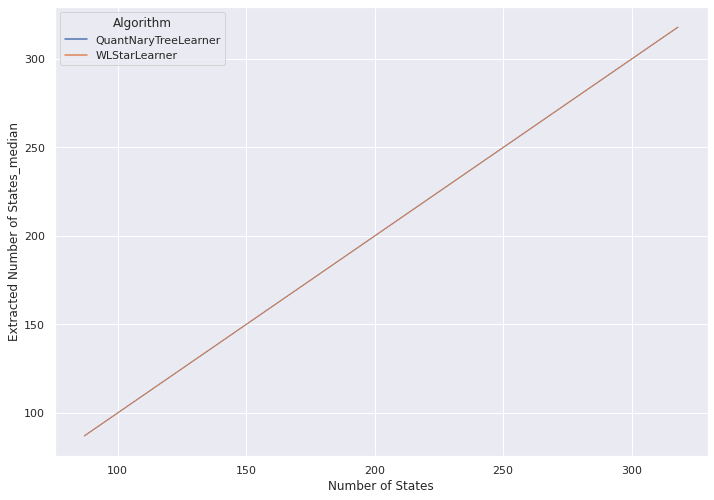

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

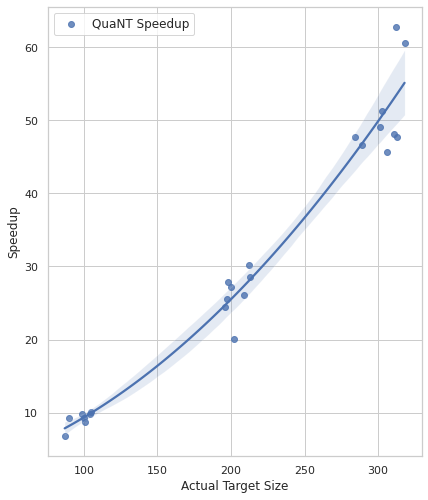

In [27]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:24])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][24:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:24], y=speedup_Q_WL, order = 2)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

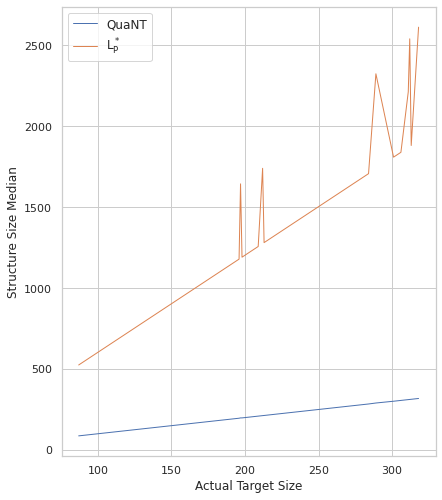

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [ ]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

In [ ]:
evaluation_data_Quant['Tree Depth'].value_counts()